# Экспоненциальное распределение

### Функция плотности экспоненциального распределения с параметром $\lambda$ имеет вид  $f(x) = \lambda e^{-\lambda x}$ при $x>0$  и  $f(x) = 0$ при $x<=0$.

#### 1.Импортируем библиотеки

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

#### 2.Зададим экспоненциально распределенную случайную величину с параметром $\lambda = 2$, сгенериуем значения, построим гистограмму и график

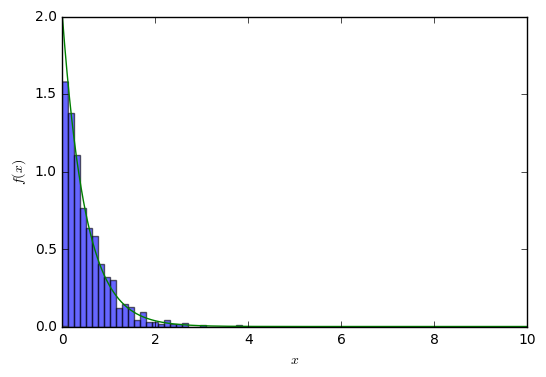

In [146]:
# зададим параметр
lam = 2.0

# зададим экспоненциально распределенную случайную величину
expon_rv = sts.expon(scale=1/lam, loc = 0)

# сгенерируем 1000 значений
sample = expon_rv.rvs(size=1000)

# сторим гсторграмму из 30 столбцов
plt.hist(sample, bins = 30, normed = True, alpha = 0.6)

# стороим график плотности
x = np.linspace(0,10,1000)
y = expon_rv.pdf(x)
plt.plot(x, y)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

### 3.Сгенерируем 1000 выборок разного объёма и построим гистограммы распределений их выборочных средних

#### 3.0 Математиское ожидание экпоненциального распределения равно  $1/\lambda$, а дисперсия -   $1/\lambda ^2$

Посчитаем математиское ожидание и деперсию для нашего распределия и напишем функцию построения графика плотности нормального распредения с нашими параметрами

In [126]:
expected_value = 1.0/lam
dispersion = 1.0/(lam**2)

def norm_distribution_plot(n):
    norm_rv = sts.norm(loc = expected_value, scale = np.sqrt(dispersion/n))
    a = np.linspace(0,2,80)
    b = norm_rv.pdf(a)
    plt.plot(a, b)

#### 3.1 Напишем функцию генерации выборок и построения гистограммы для разных n

In [141]:
def sample_generation(n):
    
    #генерируем 1000 выборок объёма n
    n_samples = [] #массив выборок
    for i in range(1000):
        n_samples.append(expon_rv.rvs(size = n))
        
    #содаём массив выборочных средних для каждой выборки из 1000
    sample_means = []  
    for j in n_samples:
        sample_means.append((j.sum()/float(n)))
                            
    #строим гистограмму выборочных средних                           
    plt.hist(sample_means, bins = 20, normed = True, alpha = 0.6)
    
    norm_distribution_plot(n)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')

#### 3.2.1 Сгенерируем 1000 выборок объёма n = 10

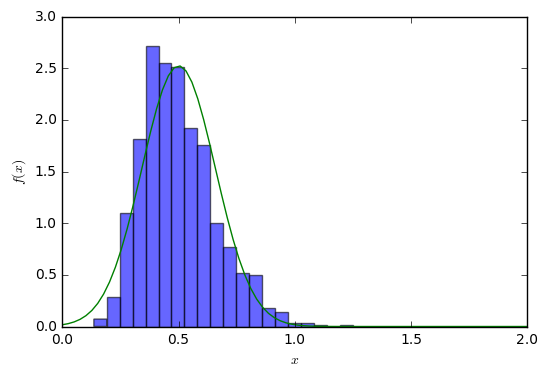

In [142]:
n = 10
sample_generation(n)

#### 3.2.2 Сгенерируем 1000 выборок объёма n = 60

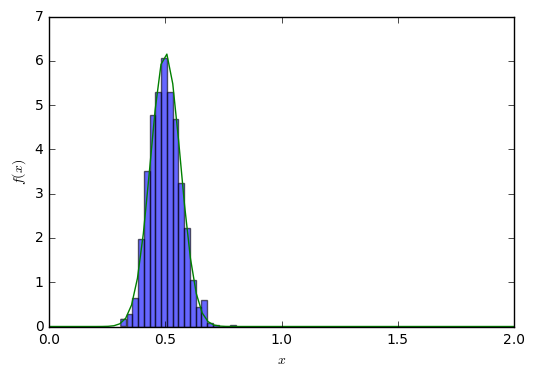

In [143]:
n = 60
sample_generation(n)

#### 3.2.3 Сгенерируем 1000 выборок объёма n = 120

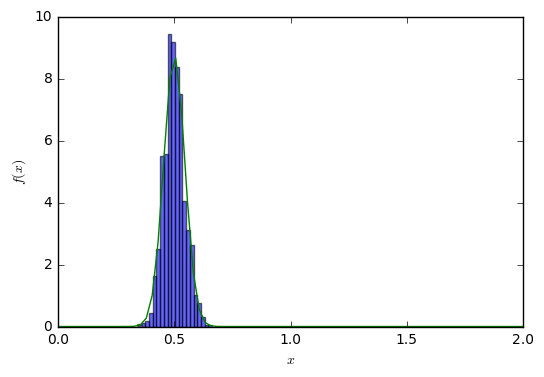

In [144]:
n = 120
sample_generation(n)

#### 3.2.4 Сгенерируем 1000 выборок объёма n = 300

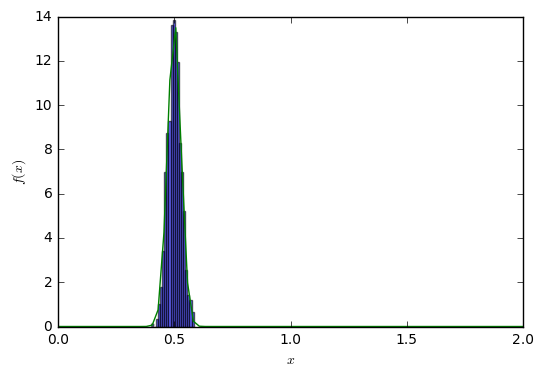

In [145]:
n = 300
sample_generation(n)

### Вывод:

Итак, мы видим, что при увеличении $n$, то есть при увеличении объёма выборки, ворастает точность аппроксимации распределения выборочных средних нормальным распределением. Этот факт не должен нас удивлять, ибо подобное поведение распределения выборочных средних и его связь с нормальным распределением (с параметрами математического ожидания и дисперсии (делёной на $n$) изначального распределения) описана в центральной граничной теореме.